# Homework 2 (Part 2): Spectral clustering


<span style="color: red; font-size: 14pt">Soft deadline: 12.05.2024</span>

<span style="color: red; font-size: 14pt">Hard deadline: 15.05.2024 (-2 points) </span>

**Requirements**:

- The report should be in a file: ``MDA2024-HW2-Spectral_Clustering_Part_2_<your_full_name>.ipynb``;
- It should be sent to dmitrii.ignatov@gmail.com (Dmitry Ignatov: the lecturer) and Frank Acquaye <acquayefrank@gmail.com> and Denis Pozdnyakov <dvpozdnyakov@hse.ru> (TAs) with the topic ``[MDA2024-HW2-Spectral_Clustering_Part_2]-<your_full_name>``.

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [128]:
A=np.array([[1, 2], [2, 1]])

In [129]:
help(np.linalg)

Help on package numpy.linalg in numpy:

NAME
    numpy.linalg

DESCRIPTION
    ``numpy.linalg``
    
    The NumPy linear algebra functions rely on BLAS and LAPACK to provide efficient
    low level implementations of standard linear algebra algorithms. Those
    libraries may be provided by NumPy itself using C versions of a subset of their
    reference implementations but, when possible, highly optimized libraries that
    take advantage of specialized processor functionality are preferred. Examples
    of such libraries are OpenBLAS, MKL (TM), and ATLAS. Because those libraries
    are multithreaded and processor dependent, environmental variables and external
    packages such as threadpoolctl may be needed to control the number of threads
    or specify the processor architecture.
    
    - OpenBLAS: https://www.openblas.net/
    - threadpoolctl: https://github.com/joblib/threadpoolctl
    
    Please note that the most-used linear algebra functions in NumPy are present in
    t

In [130]:
np.linalg.matrix_power(A,-2)

array([[ 0.55555556, -0.44444444],
       [-0.44444444,  0.55555556]])

In [131]:
from math import sqrt

In [132]:
help(np.linalg.qr)

Help on _ArrayFunctionDispatcher in module numpy.linalg:

qr(a, mode='reduced')
    Compute the qr factorization of a matrix.
    
    Factor the matrix `a` as *qr*, where `q` is orthonormal and `r` is
    upper-triangular.
    
    Parameters
    ----------
    a : array_like, shape (..., M, N)
        An array-like object with the dimensionality of at least 2.
    mode : {'reduced', 'complete', 'r', 'raw'}, optional, default: 'reduced'
        If K = min(M, N), then
    
        * 'reduced'  : returns Q, R with dimensions (..., M, K), (..., K, N)
        * 'complete' : returns Q, R with dimensions (..., M, M), (..., M, N)
        * 'r'        : returns R only with dimensions (..., K, N)
        * 'raw'      : returns h, tau with dimensions (..., N, M), (..., K,)
    
        The options 'reduced', 'complete, and 'raw' are new in numpy 1.8,
        see the notes for more information. The default is 'reduced', and to
        maintain backward compatibility with earlier versions of nump

In this exercise we follow graph clustering example from David Gleich's tutorial: https://www.dropbox.com/s/w06niyzfe2r8y90/tutorial.pdf?dl=0.

### 1 (Warm up). Finding a partition (0%)
Generate a graph repsresnted by its adjecency matrix that consists of two communities.

In [133]:
# the number of vertices
# (each vertex is an individual actor, for example, a person with certain political views, e.g. republican or democrat)

n = 1000

# an array of n vertices
x = np.arange(n)

# random permutations
np.random.shuffle(x)

# the size of the first group
gs = 450

# let us select gs group members to the first group
group1 = x[:gs]

# and n-gs representatives to the second one
group2 = x[gs:]

# the probability of connection within the first group
p_group1 = 0.5

# the probability of connection within the second group
p_group2 = 0.4

# intergroup connections
p_between = 0.1

# initialistion of the adjacency matrix nxn
A = np.zeros([n, n])

In [134]:
n = 1000

In [135]:
x = np.arange(n)

In [136]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
np.random.shuffle(x)

In [ ]:
x

array([786, 376, 330, 316, 573, 471, 407, 244, 280, 139, 130, 252, 861,
       109, 403, 951, 715, 824, 677, 297, 318, 178, 690, 585, 750, 683,
       430, 945, 582, 998, 845, 611,   9, 501, 989,  15, 446, 637, 538,
       878, 907, 290, 778, 107, 555, 481, 809, 469, 423, 771, 533, 503,
       457,  64,  38, 229, 949, 351, 720, 424, 834, 522, 497, 624, 190,
       639, 922, 506, 303, 156, 199, 685, 990,  95, 892, 899, 660, 847,
       782,  34, 221, 986,  54, 851, 571,  23, 941,  27, 200, 149, 548,
       675, 976, 307, 897, 406, 279, 140, 670, 121, 249, 717, 269, 203,
       887, 562, 844, 245, 462, 155, 391, 840, 903, 482, 258, 209, 854,
       860,  61,  77, 212, 170, 995, 366, 739, 738,  44, 635, 129, 937,
       354, 858, 794, 374, 667, 274, 413, 984, 454,  31,  99, 944, 906,
       444, 648,  78, 242, 798, 512, 185, 153, 791, 373, 453, 695, 694,
       381, 938, 975,  46, 600, 936, 874, 511, 924, 673,  62, 895,  49,
       964, 962, 166, 346, 568, 546, 266, 500, 843, 458, 870, 55

In [ ]:
# the size of the first group
gs = 450

# let us select gs group members to the first group
group1 = x[:gs]

In [ ]:
len(group1)

450

In [ ]:
group1

array([786, 376, 330, 316, 573, 471, 407, 244, 280, 139, 130, 252, 861,
       109, 403, 951, 715, 824, 677, 297, 318, 178, 690, 585, 750, 683,
       430, 945, 582, 998, 845, 611,   9, 501, 989,  15, 446, 637, 538,
       878, 907, 290, 778, 107, 555, 481, 809, 469, 423, 771, 533, 503,
       457,  64,  38, 229, 949, 351, 720, 424, 834, 522, 497, 624, 190,
       639, 922, 506, 303, 156, 199, 685, 990,  95, 892, 899, 660, 847,
       782,  34, 221, 986,  54, 851, 571,  23, 941,  27, 200, 149, 548,
       675, 976, 307, 897, 406, 279, 140, 670, 121, 249, 717, 269, 203,
       887, 562, 844, 245, 462, 155, 391, 840, 903, 482, 258, 209, 854,
       860,  61,  77, 212, 170, 995, 366, 739, 738,  44, 635, 129, 937,
       354, 858, 794, 374, 667, 274, 413, 984, 454,  31,  99, 944, 906,
       444, 648,  78, 242, 798, 512, 185, 153, 791, 373, 453, 695, 694,
       381, 938, 975,  46, 600, 936, 874, 511, 924, 673,  62, 895,  49,
       964, 962, 166, 346, 568, 546, 266, 500, 843, 458, 870, 55

In [ ]:
len(group1)

450

In [ ]:
# and n-gs representatives to the second one
group2 = x[gs:]

In [ ]:
# the probability of connection within the first group
p_group1 = 0.5

# the probability of connection within the second group
p_group2 = 0.4

# intergroup connections
p_between = 0.1

# initialistion of the adjacency matrix nxn
A = np.zeros([n, n])

In [ ]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
assert A.shape == (1000, 1000)

In [ ]:
# adjecency submatrix for the first group
A[np.ix_(group1, group1)].shape

(450, 450)

In [ ]:
np.random.rand(gs, gs) < p_group1

array([[ True,  True, False, ...,  True, False, False],
       [ True,  True, False, ...,  True,  True, False],
       [False,  True, False, ...,  True, False, False],
       ...,
       [False,  True,  True, ..., False,  True,  True],
       [False,  True,  True, ..., False,  True, False],
       [False,  True,  True, ..., False,  True, False]])

In [ ]:
np.random.rand(gs, gs)

array([[0.17188359, 0.69895671, 0.61588981, ..., 0.27806794, 0.12193433,
        0.90390178],
       [0.16184002, 0.87143698, 0.51799125, ..., 0.16125207, 0.72909705,
        0.78330153],
       [0.14575642, 0.79866418, 0.80061974, ..., 0.6877428 , 0.62962104,
        0.3166281 ],
       ...,
       [0.4089622 , 0.16229019, 0.61646194, ..., 0.52569062, 0.78199547,
        0.18893727],
       [0.63932705, 0.83842337, 0.28999528, ..., 0.06487342, 0.29614658,
        0.22537971],
       [0.92584437, 0.04477328, 0.85732467, ..., 0.37314313, 0.76747548,
        0.72948073]])

In [ ]:
# generation of connections in the first group
A[np.ix_(group1, group1)] = np.random.rand(gs, gs) < p_group1

# generation of connections in the second group
A[np.ix_(group2, group2)] = np.random.rand(n-gs, n-gs) < p_group2

# genegation of intergroup connections
A[np.ix_(group1, group2)] = np.random.rand(gs, n-gs) < p_between

# we need a symmetric matrix for modeling "friendship relationship"
# and cut the upper triangle matrix
A = np.triu(A,1)


# let us transpose it and add to the upper triangle matrix
A = A + A.T

In [ ]:
# generation of connections in the first group
A[np.ix_(group1, group1)] = np.random.rand(gs, gs) < p_group1

# generation of connections in the second group
A[np.ix_(group2, group2)] = np.random.rand(n-gs, n-gs) < p_group2

# genegation of intergroup connections
A[np.ix_(group1, group2)] = np.random.rand(gs, n-gs) < p_between



In [ ]:
# A.T[10,4]== A[10,4]

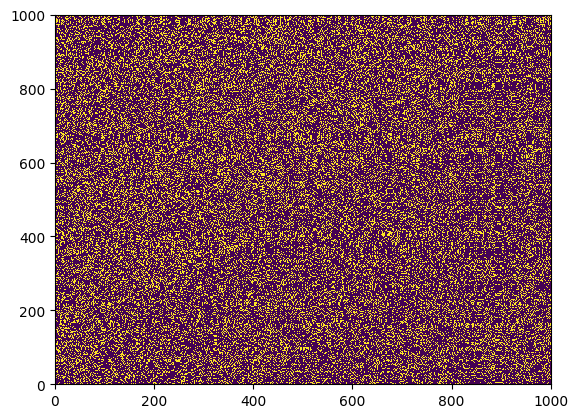

In [ ]:
plt.pcolormesh(A)

In [ ]:
A = np.triu(A,1)

In [ ]:
help(np.triu)

Help on _ArrayFunctionDispatcher in module numpy:

triu(m, k=0)
    Upper triangle of an array.
    
    Return a copy of an array with the elements below the `k`-th diagonal
    zeroed. For arrays with ``ndim`` exceeding 2, `triu` will apply to the
    final two axes.
    
    Please refer to the documentation for `tril` for further details.
    
    See Also
    --------
    tril : lower triangle of an array
    
    Examples
    --------
    >>> np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)
    array([[ 1,  2,  3],
           [ 4,  5,  6],
           [ 0,  8,  9],
           [ 0,  0, 12]])
    
    >>> np.triu(np.arange(3*4*5).reshape(3, 4, 5))
    array([[[ 0,  1,  2,  3,  4],
            [ 0,  6,  7,  8,  9],
            [ 0,  0, 12, 13, 14],
            [ 0,  0,  0, 18, 19]],
           [[20, 21, 22, 23, 24],
            [ 0, 26, 27, 28, 29],
            [ 0,  0, 32, 33, 34],
            [ 0,  0,  0, 38, 39]],
           [[40, 41, 42, 43, 44],
            [ 0, 46, 47, 48, 49]

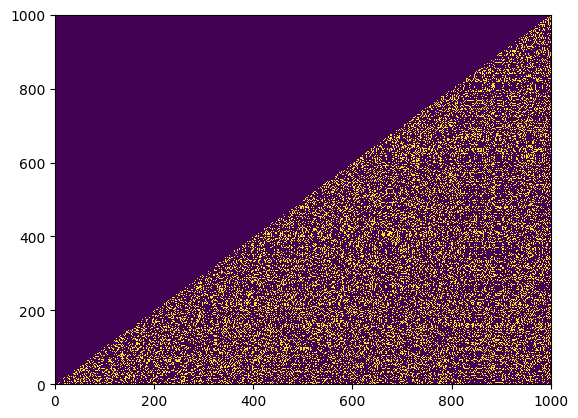

In [ ]:
plt.pcolormesh(A)

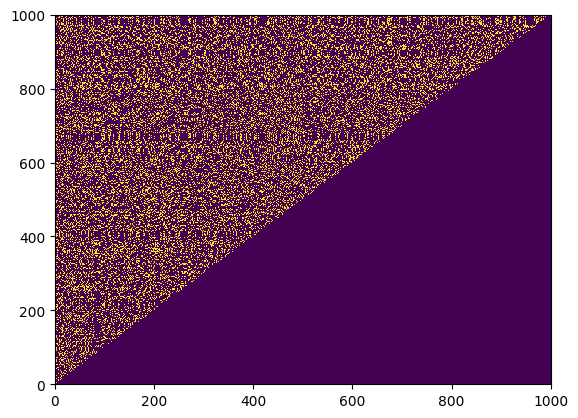

In [ ]:
plt.pcolormesh(A.T)

In [ ]:
A=A+A.T

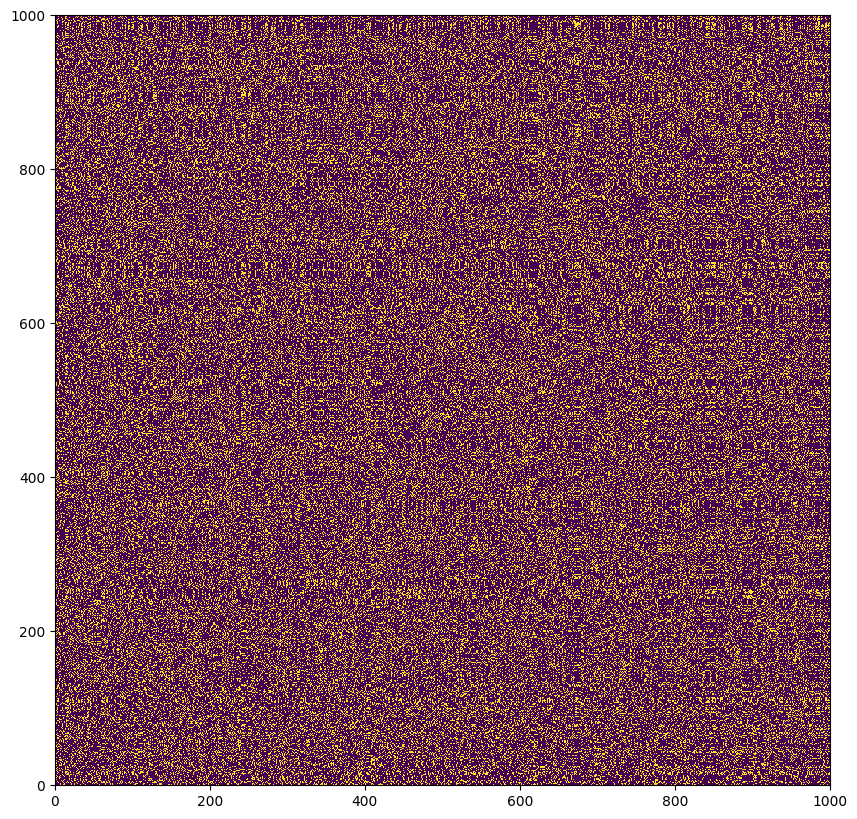

In [ ]:
plt.figure(figsize=(10,10))
plt.pcolormesh(A)

In [ ]:
 A.min(), A.max()

(np.float64(0.0), np.float64(1.0))

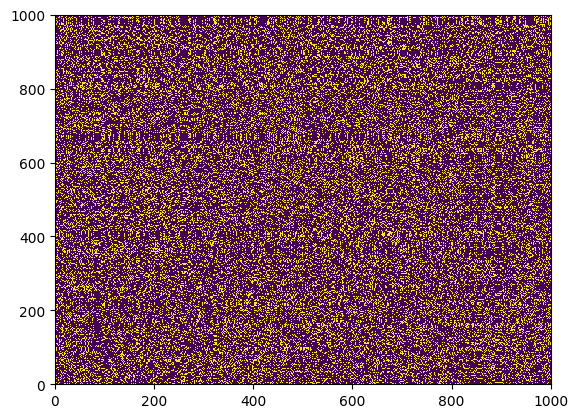

In [ ]:
# let us have a look (it seems, the structure is absent)
plt.pcolormesh(A);

In [ ]:
A[1,3]==A[3,1]

np.True_

In [ ]:
#checking the symmetry
sum(sum(np.abs(A-A.T)))

np.float64(0.0)

In [ ]:
#cheking the main diagonal -- it should be empty
sum(np.diag(A))

np.float64(0.0)

Follow the hints from the tutorial. First, calculate the Laplacian matrix, L=D-A, find its second smallest eigenvector, sort it, and use the found indicies and restore the model structure as the two group of  "friends".

In [ ]:
sum(A)

array([217., 218., 226., 277., 274., 280., 245., 225., 217., 268., 217.,
       211., 206., 275., 239., 288., 277., 276., 204., 235., 277., 206.,
       266., 280., 266., 247., 213., 271., 206., 229., 273., 278., 214.,
       215., 269., 274., 221., 222., 268., 214., 223., 229., 292., 299.,
       268., 218., 296., 219., 215., 277., 222., 199., 226., 298., 270.,
       224., 227., 232., 214., 234., 272., 233., 290., 215., 302., 239.,
       250., 307., 281., 230., 262., 232., 259., 265., 237., 229., 273.,
       279., 272., 206., 229., 220., 216., 227., 276., 234., 214., 284.,
       222., 276., 254., 275., 222., 234., 253., 261., 271., 233., 267.,
       276., 278., 260., 226., 262., 229., 251., 224., 275., 289., 275.,
       251., 276., 256., 283., 217., 216., 229., 249., 269., 247., 226.,
       313., 222., 244., 231., 232., 231., 293., 261., 255., 268., 269.,
       234., 245., 219., 230., 233., 216., 221., 258., 264., 223., 225.,
       248., 233., 263., 225., 238., 273., 261., 25

(array([ 12.,  66., 153., 219., 213., 178., 105.,  42.,   9.,   3.]),
 array([196. , 207.7, 219.4, 231.1, 242.8, 254.5, 266.2, 277.9, 289.6,
        301.3, 313. ]),
 <BarContainer object of 10 artists>)

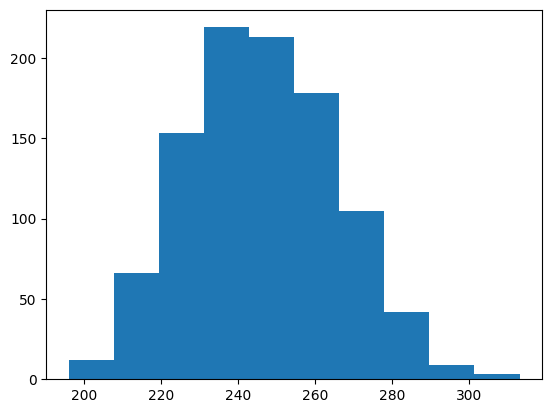

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sum(A))

In [ ]:
D=np.diag(sum(A))

In [ ]:
max(sum(A))

np.float64(313.0)

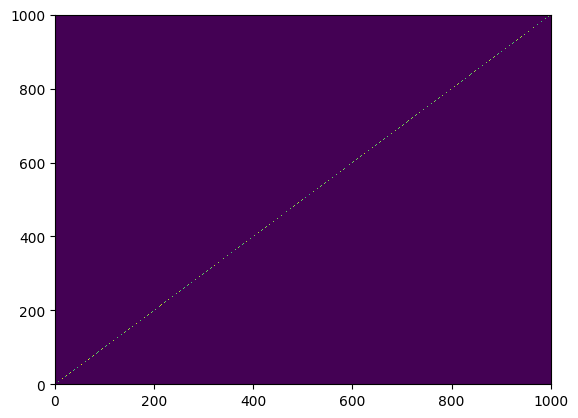

In [ ]:
plt.pcolormesh(D);

In [ ]:
L=D-A

In [ ]:
from scipy.sparse.linalg import eigsh #a better choice than numpy

In [ ]:
import scipy
help(scipy.sparse.linalg.eigsh)

Help on function eigsh in module scipy.sparse.linalg._eigen.arpack.arpack:

eigsh(A, k=6, M=None, sigma=None, which='LM', v0=None, ncv=None, maxiter=None, tol=0, return_eigenvectors=True, Minv=None, OPinv=None, mode='normal')
    Find k eigenvalues and eigenvectors of the real symmetric square matrix
    or complex Hermitian matrix A.
    
    Solves ``A @ x[i] = w[i] * x[i]``, the standard eigenvalue problem for
    w[i] eigenvalues with corresponding eigenvectors x[i].
    
    If M is specified, solves ``A @ x[i] = w[i] * M @ x[i]``, the
    generalized eigenvalue problem for w[i] eigenvalues
    with corresponding eigenvectors x[i].
    
    Note that there is no specialized routine for the case when A is a complex
    Hermitian matrix. In this case, ``eigsh()`` will call ``eigs()`` and return the
    real parts of the eigenvalues thus obtained.
    
    Parameters
    ----------
    A : ndarray, sparse matrix or LinearOperator
        A square operator representing the operation `

In [ ]:
#W,V=np.linalg.eigh(L)

In [ ]:
W,V=eigsh(L,which='SA') #six (by default) eignvalues are sorted in desceding order (by which='SA')

In [ ]:
W.shape

(6,)

In [ ]:
W

array([-1.06581410e-14,  4.40872040e+01,  1.93158278e+02,  1.95722448e+02,
        1.99534410e+02,  2.00022242e+02])

In [ ]:
V[:,1]

array([-0.03524453, -0.03569954, -0.03556138,  0.02782984,  0.02827865,
        0.02521412, -0.03441966, -0.03589956, -0.03531827,  0.02597465,
       -0.035702  , -0.03534479, -0.03621595,  0.02789298, -0.03417636,
        0.0242418 ,  0.02851199,  0.02616599, -0.03632968, -0.03513646,
        0.02837188, -0.03560485,  0.0290447 ,  0.02518864,  0.02703047,
       -0.03371185, -0.03568931,  0.0278415 , -0.03597185, -0.03502468,
        0.02668102,  0.02723328, -0.03459329, -0.03565176,  0.02633335,
        0.02846462, -0.03463241, -0.03563246,  0.02608754, -0.03505016,
       -0.034648  , -0.0347369 ,  0.02395178,  0.02402416,  0.02490716,
       -0.03461094,  0.02825702, -0.03503755, -0.03539335,  0.02981551,
       -0.03419408, -0.03551098, -0.03455832,  0.02481614,  0.02751063,
       -0.03457766, -0.03382773, -0.03464253, -0.03545346, -0.03412275,
        0.02459306,  0.03005874,  0.02689098, -0.03408055,  0.02514034,
       -0.03386945,  0.02852976,  0.02583195,  0.02877912, -0.03

In [ ]:
min(W),max(W)

(np.float64(-1.0658141036401503e-14), np.float64(200.02224229809127))

In [ ]:
W

array([-1.06581410e-14,  4.40872040e+01,  1.93158278e+02,  1.95722448e+02,
        1.99534410e+02,  2.00022242e+02])

In [ ]:
V[:,0] #the first samllest eigenvalue corresponds to the first eigenvector – should be a constant vector k*e, where e=(1,1,...,1), where k=sqrt(1/n)

array([-0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03

In [ ]:
from math import sqrt

In [ ]:
sqrt(1000)/1000

0.03162277660168379

In [ ]:
X=V[:,1] #the second smallest eigenvalue corresponds to the second eigenvector
Y=V[:,2]

In [ ]:
Ids1=np.argsort(X)
Ids2=np.argsort(Y)

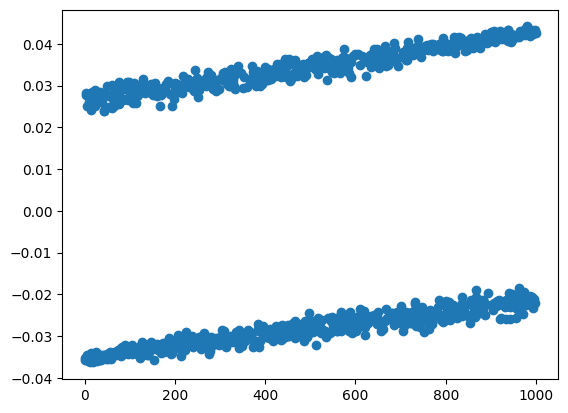

In [ ]:
plt.plot(X,"o") #original X

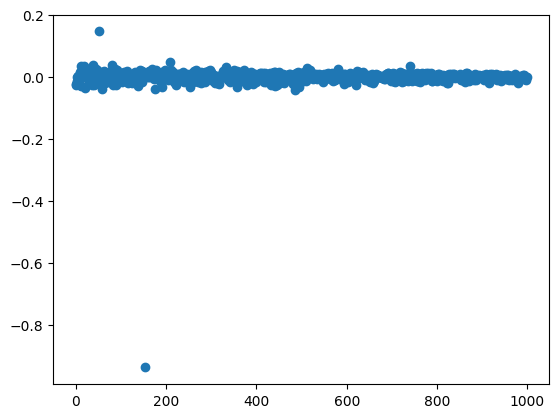

In [ ]:
plt.plot(Y,"o") #original X

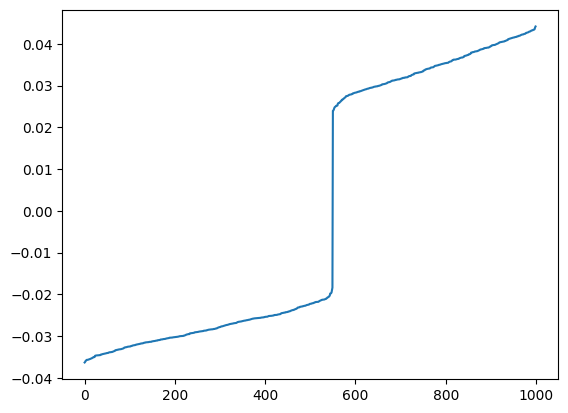

In [ ]:
plt.plot(X[Ids1])

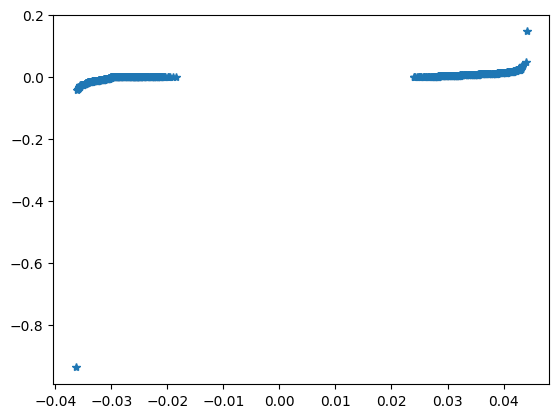

In [ ]:
plt.plot(X[Ids1],Y[Ids2],"*") #sorted X

In [ ]:
sum(np.dot(L,X)) #the result is non-zero

np.float64(3.9879211044535623e-13)

In [ ]:
sum(np.dot(L,V[:,0])) #due to numerical instability the result is non-zero for the first vector too

np.float64(5.395239810468411e-12)

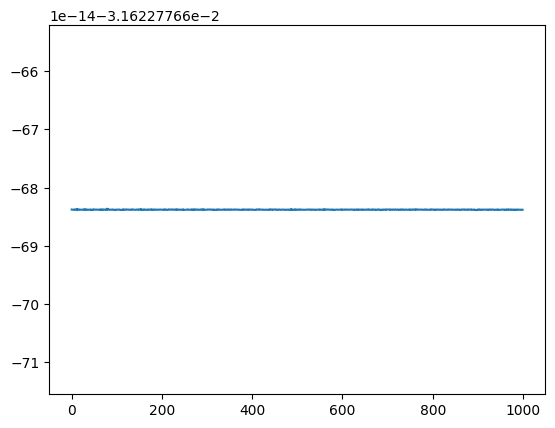

In [ ]:
plt.plot(V[:,0]) # but it does not suite our purpose

In [ ]:
B=A[Ids1,:]#let us sort our matrix according to the new order of the second vector components; first, by rows

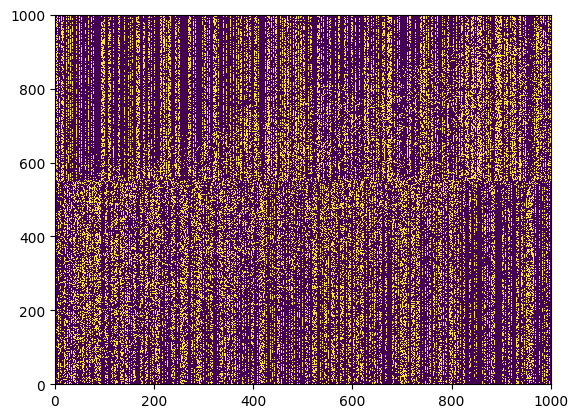

In [ ]:
plt.pcolormesh(B)

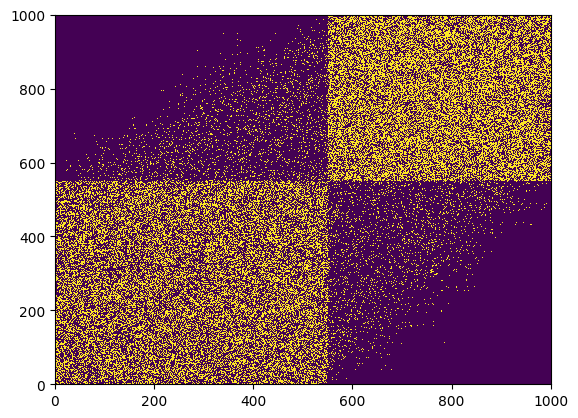

In [ ]:
plt.pcolormesh(B[:,Ids1]) #second, by columns; we identified our communities

In [ ]:
e=np.ones(1000) #just for curiosity, let us check the constant vector

In [ ]:
e

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
np.dot(L,e) # it corresponds to zero eigenvalue

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
W[0] #even though due to numeric instability it is not zero in our method

np.float64(-1.0658141036401503e-14)

### 2. Meaningful Partitions of Real Datasets (100%)
"The previous example was rather compelling. However, it was also fake."

We can play with real anonymised data from Yahoo https://www.dropbox.com/s/ii1e09dx6o2ktit/yahoo.zip?dl=0 for web advertisment.

In [ ]:
# reading data, 2000 companies, 3000 advertising terms,
# 92345 connections in the graph showing that a firm buys a term
a = np.genfromtxt('/content/us.3k.2k.smat')
a = a.astype(int)
n, m, n_connections = a[0]

In [ ]:
n,m

(np.int64(3000), np.int64(2000))

In [ ]:
n_connections

np.int64(92345)

In [ ]:
n_connections/(n*m)

np.float64(0.015390833333333333)

In [ ]:
a[1:10]

array([[  0,  23,   1],
       [  0,  96,   1],
       [  0, 188,   1],
       [  0, 328,   1],
       [  0, 556,   1],
       [  0, 632,   1],
       [  0, 672,   1],
       [  0, 700,   1],
       [  0, 714,   1]])

In [ ]:
a[0]

array([ 3000,  2000, 92345])

In [ ]:
a[1:, 0], a[1:, 1]

(array([   0,    0,    0, ..., 2999, 2999, 2999]),
 array([  23,   96,  188, ..., 1846, 1918, 1939]))

In [ ]:
#let us put data in the adjacency matrix n x m
A_small = np.zeros((n, m))
A_small[a[1:, 0], a[1:, 1]] = 1

In [ ]:
A = np.vstack(
    (np.hstack(
        (np.zeros((n, n)), A_small)
    ),
     np.hstack((A_small.T, np.zeros((m, m))))
    )
)

In [ ]:
# let us calcualte the number of non-zero elements (connections)
assert sum(sum(A_small)) == 92345

In [126]:
# let us read terms along with their ids
with open("/content/us.3k.2k.trms", 'r') as iofile:
    labels = iofile.readlines()

In [ ]:
labels[0]

Perfrom the second task from the tutorial. First, calculate the Laplacian matrix, L=D-A, find its second smallest eigenvector, sort it, and use the found indicies to find interpretable clusters of advertising terms (2-3 such clusters is enough). As an alternative out-of-the-box solution, you can use the implementation of Spectral Clustering with a given number of clusters from scikit-learn: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

In [137]:
import numpy as np
from scipy.sparse import coo_matrix
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

#Load the .smat file

In [138]:
with open("/content/us.3k.2k.smat") as f:
    lines = f.readlines()

n_rows, n_cols, n_nz = map(int, lines[0].strip().split())
rows, cols, data = [], [], []

for line in lines[1:]:
    try:
        i, j, val = line.strip().split()
        i, j = int(i), int(j)
        if 1 <= i <= n_rows and 1 <= j <= n_cols:
            rows.append(i - 1)
            cols.append(j - 1)
            data.append(float(val))
    except ValueError:
        print("Skipping malformed line:", line.strip())

A_sparse = coo_matrix((data, (rows, cols)), shape=(n_rows, n_cols))

Skipping malformed line: 


#Compute term-term similarity matrix

In [139]:
W = A_sparse @ A_sparse.T
W_dense = W.toarray()

#Compute Laplacian matrix

In [140]:
degrees = np.array(W_dense.sum(axis=1))
D = np.diag(degrees)
L = D - W_dense

#Compute eigenvalues and Fiedler vector ===

In [141]:
eigenvalues, eigenvectors = eigh(L)
fiedler_vector = eigenvectors[:, 1]

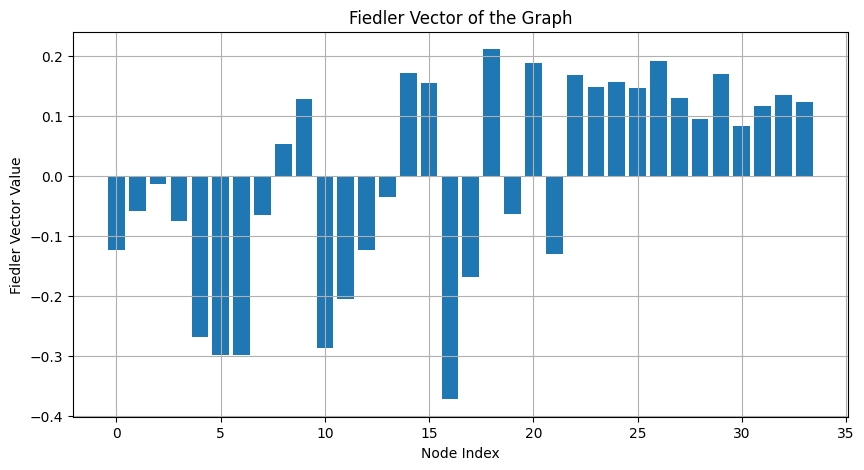

In [150]:
G = nx.karate_club_graph()
L = nx.laplacian_matrix(G).toarray()
eigenvalues, eigenvectors = eigh(L)
fiedler_vector = eigenvectors[:, 1]
plt.figure(figsize=(10, 5))
plt.bar(range(len(fiedler_vector)), fiedler_vector)
plt.xlabel("Node Index")
plt.ylabel("Fiedler Vector Value")
plt.title("Fiedler Vector of the Graph")
plt.grid(True)
plt.show()

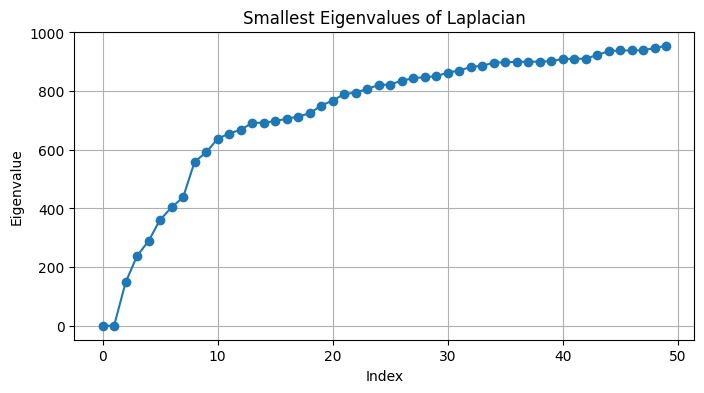

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(eigenvalues[:50], marker='o')
plt.title("Smallest Eigenvalues of Laplacian")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()


#Sort indices

In [144]:
sorted_indices = np.argsort(fiedler_vector)
with open("/content/us.3k.2k.trms", "r") as f:
    terms = [line.strip() for line in f.readlines()]
print("=== Manual Spectral Clustering using Fiedler Vector ===")
print("\nCluster 1:")
print([terms[i] for i in sorted_indices[:10]])

print("\nCluster 2:")
print([terms[i] for i in sorted_indices[10:20]])

print("\nCluster 3:")
print([terms[i] for i in sorted_indices[20:30]])

=== Manual Spectral Clustering using Fiedler Vector ===

Cluster 1:
['accommodation las vegas', 'diego san', 'gambling offshore sport', 'casino gambling line', 'lose ways weight', 'accessory desk', 'account cost low merchant', 'cyber sex', 'bar protein', 'diet fitness']

Cluster 2:
['custom design web', 'munich', 'accommodation new york', 'designer page web', 'loss plan weight', 'colorado mortgage', 'city kansas', 'glutamine', 'amateur sex', 'free promotion site web']

Cluster 3:
['pussy teen', 'gallery porn', 'acapulco hotel', 'adult personal', 'site web', 'cum facial shot', 'fuck', 'diet plan', 'hp toner', 'victoria']


# What the clusters say? Interpretation

**Cluster 1**:

Customers in this cluster are probably middle-aged or young adults who enjoy travel, fitness, and online shopping; they may be more likely to be men, have discretionary means, and are drawn to high-risk/reward pursuits like gambling, diet fads, and adult content.

**Cluster 2**:

Together with exercise gear and a few terms of personal interest, this cluster includes small business promotions and local service marketing.  It might represent the nexus between the entrepreneurial web economy and real-world life services like travel and mortgage.

**Cluster 3**:

With some crossover into e-commerce and marketing, this cluster is mostly driven by explicit material and adult entertainment.  This aligns with adult content networks that also cross-promote personal products, travel, or diet.

C

#Plot Fiedler vector

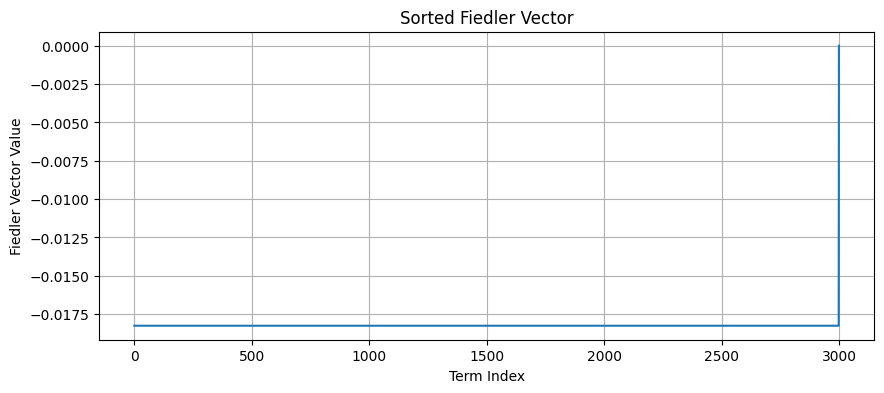

In [145]:
plt.figure(figsize=(10, 4))
plt.plot(sorted(fiedler_vector))
plt.title("Sorted Fiedler Vector")
plt.xlabel("Term Index")
plt.ylabel("Fiedler Vector Value")
plt.grid(True)
plt.show()

Spectral Clustering using KMean

In [146]:
clustering = SpectralClustering(
    n_clusters=3,
    affinity='precomputed',
    assign_labels='kmeans',
    random_state=42
)
labels = clustering.fit_predict(W_dense)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


#Print clusters

In [147]:
print("\n Spectral Clustering (sklearn)")
for i in range(3):
    print(f"\nCluster {i+1}:")
    print([terms[j] for j in np.where(labels == i)[0][:10]])


 Spectral Clustering (sklearn)

Cluster 1:
['acid folic', 'acura cl', 'adds personal', 'adipex', 'adipex buy', 'adipex buy online', 'adipex cheap', 'adipex diet', 'adipex diet pill', 'adipex line']

Cluster 2:
['12a1970 lexmark', '21 black jack', '2nd mortgage', 'acapulco hotel', 'accept account card credit merchant', 'accept card credit', 'accept card credit online', 'accessory computer', 'accessory desk', 'accommodation']

Cluster 3:
['2 stacker', 'ads single', 'adult', 'adult dating services', 'adult entertainment', 'adult film', 'adult movie', 'adult movie sex', 'adult personal', 'adult picture']


#Spectral Clustering Interpretation

**Cluster 1**:

Travel, office hardware, and e-commerce logistics are all combined in this cluster, which is geared toward small business owners, regular travelers, and online investors and shoppers. The user group appears to be more transactional and service-oriented based on the combination of leisure and financial elements.

**Cluster 2**:

For the purpose of segmenting ad placements in the explicit material, online dating, or personal service verticals, this neat and condensed cluster of adult-related questions is perfect.  Probably aimed at late-night or age-restricted sites, this traffic is likely male.

**Cluster 3**:

Weight loss, long-distance communication, and domestic travel are all included in this cluster of affordable, useful services.  A more cost-conscious population that wants to manage their communication, travel, and health needs while saving money appears to be drawn to it.  could be a representation of lower-income groups, tourists, or immigrants.

#Plot clusters

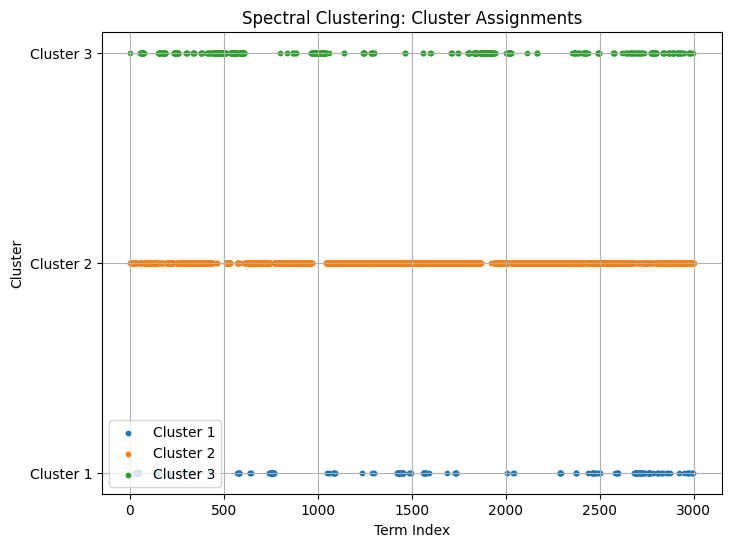

In [148]:
plt.figure(figsize=(8, 6))
for i in range(3):
    cluster_points = np.where(labels == i)[0]
    plt.scatter(cluster_points, [i]*len(cluster_points), label=f'Cluster {i+1}', s=10)
plt.title("Spectral Clustering: Cluster Assignments")
plt.xlabel("Term Index")
plt.ylabel("Cluster")
plt.yticks([0, 1, 2], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.legend()
plt.grid(True)
plt.show()
